In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('data_cables_demanda.csv',sep=';', encoding='latin-1')

In [32]:
df.columns


Index(['periodo_vta', 'ano_vta', 'mes_vta', 'mes_char_vta', 'CategoriaPricing',
       'SubcategoriaPricing', 'TipoOferta', 'RUT_CLI', 'N_VTA', 'ITEM',
       'NOM_PROV', 'FEC_DOC', 'per_vta_insigth', 'CANAL', 'NEGOCIO', 'venta',
       'VTA_ESPEC', 'ClasificacionCanalVenta',
       'ClasificacionCanalOfflineEbusiness', 'VerticalPricing',
       'flag_especial', 'ana_esp', 'sucursal', 'proveedor',
       'flag_recuperacion', 'total', 'MARGEN_WAC', 'MARGEN_WAC_FORMULA',
       'MARGEN_COM', 'cantidad', 'nivel1', 'nivel2', 'nivel3',
       'flag_descuento', 'id', 'MargenCotizacion'],
      dtype='object')

In [91]:
#revisemos las subfamilias que hay 
df['SubcategoriaPricing'].unique()

array(['Aluminio Aislado y Desnudo                                                      ',
       'Concéntrico                                                                     ',
       'Control o Cordon Cubierta PVC                                                   ',
       'Desnudo Blando                                                                  ',
       'Desnudo Rígido                                                                  ',
       'Esmaltado Cobre                                                                 ',
       'Mono conductor Baja Tensión Cubierta Libre halogenos                            ',
       'Mono conductor Baja Tensión Cubierta PVC                                        ',
       'Multi conductor Baja Tensión Cubierta Libre halogenos                           ',
       'Multi conductor Baja Tensión Cubierta PVC                                       ',
       'Especiales Uso Naval y Marino Sumergido                                         ',

In [92]:
#seleccionamos una de las subfamilias
df_subfamilia=df[df.SubcategoriaPricing=='Mono conductor Baja Tensión Cubierta Libre halogenos                            ']

In [93]:
df_subfamilia

,periodo_vta,ano_vta,mes_vta,mes_char_vta,CategoriaPricing,SubcategoriaPricing,TipoOferta,RUT_CLI,N_VTA,ITEM,...,MARGEN_WAC,MARGEN_WAC_FORMULA,MARGEN_COM,cantidad,nivel1,nivel2,nivel3,flag_descuento,id,MargenCotizacion
296,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,14211940,1495226,RZ1000,...,6944.16,6944.16,5400.0,200,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,243665.0,0.2000
297,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,14211940,1495226,RZ1012,...,10219.80,10219.80,8100.0,300,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,243665.0,0.2000
298,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,14211940,1495226,RZ1018,...,6999.32,6999.32,5400.0,200,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,243665.0,0.2000
299,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,71644300,1493971,RZ1020,...,3878.39,3878.39,2600.0,100,CONVENIOS,-,-,Sin Descuento,242281.0,0.1632
300,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,71644300,1493971,RZ1022,...,3890.80,3890.80,2600.0,100,CONVENIOS,-,-,Sin Descuento,242281.0,0.1632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128004,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,88983600,1832245,TP130001,...,23420.82,23420.82,18700.0,100,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,NaN,NaN
128005,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,96665000,1838351,TP130002,...,122207.76,122207.76,87600.0,600,NORMAL,Con Descuento,Descuento Propio,Descuento Propio,6487053.0,0.1431
128006,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,96917120,1832816,TP150002,...,389600.00,389600.00,374400.0,800,NORMAL,Con Descuento,Descuento Propio,Descuento Propio,6479446.0,0.2047
128007,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta Libre hal...,normal,96917120,1832816,TP150002,...,-389600.00,-389600.00,-374400.0,800,NORMAL,Con Descuento,Descuento Propio,Descuento Propio,6479446.0,0.2047


In [94]:
#seleccionamos 1 subfamilia 
df_subfamilia=df_subfamilia[['periodo_vta', 'NEGOCIO', 'total',  'MARGEN_COM', 'cantidad', 'nivel1', 'nivel2', 'nivel3','RUT_CLI']]
df_subfamilia=df_subfamilia[(df_subfamilia.NEGOCIO=='Distribución')*
              (df_subfamilia.total>0)*
              (df_subfamilia.MARGEN_COM>0)*
              (df_subfamilia.cantidad>0)*
              (df_subfamilia.nivel1=='NORMAL')*
              (df_subfamilia.nivel3!='Descuento Proveedor')*
              (df_subfamilia.periodo_vta>=202306)*
              (df_subfamilia.RUT_CLI>=6666666)
              ]

In [95]:
df_subfamilia['margen_per']=df_subfamilia.MARGEN_COM/df_subfamilia.total

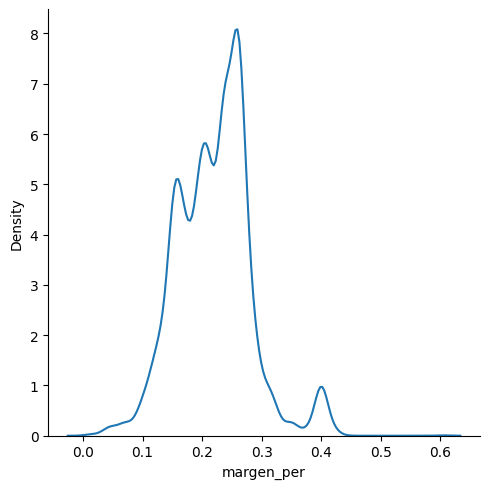

In [96]:
sns.displot(data=df_subfamilia, x="margen_per",kind="kde")

In [97]:
df_subfamilia

,periodo_vta,NEGOCIO,total,MARGEN_COM,cantidad,nivel1,nivel2,nivel3,RUT_CLI,margen_per
108260,202306,Distribución,28700.0,5700.0,100,NORMAL,Sin Descuento,Sin Descuento,9431250,0.198606
108261,202306,Distribución,36600.0,9600.0,200,NORMAL,Sin Descuento,Sin Descuento,9699532,0.262295
108262,202306,Distribución,36600.0,9600.0,200,NORMAL,Sin Descuento,Sin Descuento,9699532,0.262295
108263,202306,Distribución,36600.0,9600.0,200,NORMAL,Sin Descuento,Sin Descuento,9699532,0.262295
108264,202306,Distribución,36600.0,9600.0,200,NORMAL,Sin Descuento,Sin Descuento,9699532,0.262295
...,...,...,...,...,...,...,...,...,...,...
128002,202312,Distribución,95130.0,17430.0,70,NORMAL,Sin Descuento,Sin Descuento,85956200,0.183223
128004,202312,Distribución,97500.0,18700.0,100,NORMAL,Sin Descuento,Sin Descuento,88983600,0.191795
128005,202312,Distribución,753600.0,87600.0,600,NORMAL,Con Descuento,Descuento Propio,96665000,0.116242
128006,202312,Distribución,1792000.0,374400.0,800,NORMAL,Con Descuento,Descuento Propio,96917120,0.208929


In [129]:
def linspace(start, stop, step=1.):
  return np.linspace(start, stop, int((stop - start) / step + 1))

margin=linspace(0,np.round(max(df_subfamilia.margen_per),2), step=.01).tolist()
total_venta=df_subfamilia.total.sum()/6
vol_venta=[(total_venta-sum(df_subfamilia.total[df_subfamilia.margen_per>i])/6)/total_venta for i in margin]

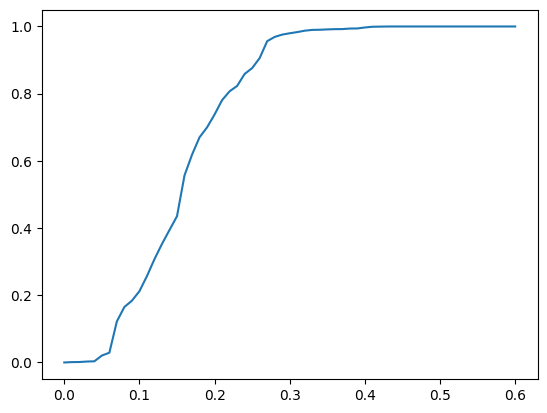

In [130]:
plt.plot(margin,vol_venta)

In [131]:
valores_obs=vol_venta

t_eval=margin
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import pandas as pd

# Función de la ecuación diferencial
def funcion(t, k, s, alpha, n, d):
    return s * k**alpha - (n + d) * k

# Función para calcular la solución de la ecuación diferencial con parámetros dados
def solve_equation(params):
    s, alpha, n, d = params
    resultado = solve_ivp(funcion, (0, 100), [0.5], args=(s, alpha, n, d), t_eval=t_eval)
    return resultado.y[0]

# Función objetivo para la optimización (ajuste de curvas)
def objective(params):
    model_solution = solve_equation(params)
    return np.sum((model_solution - valores_obs)**2)  # Minimizar la suma de cuadrados de las diferencias




In [136]:
# Valores iniciales para los parámetros
initial_guess = [0.3, 0.3, 0.01, 0.05]

# Optimización
result = minimize(objective, initial_guess, method='BFGS')
optimized_params = result.x

# Usar los parámetros optimizados para resolver la ecuación diferencial
optimized_solution = solve_ivp(funcion, (0, 100), [0.5], args=tuple(optimized_params), t_eval=margin)


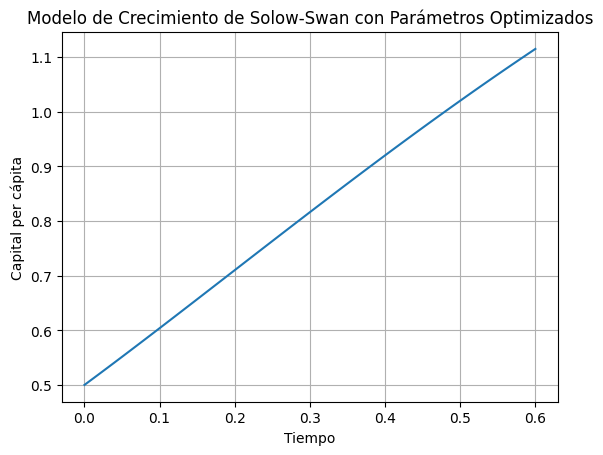

In [137]:
# Graficar la solución optimizada
plt.plot(optimized_solution.t, optimized_solution.y[0])
plt.title('Modelo de Crecimiento de Solow-Swan con Parámetros Optimizados')
plt.xlabel('Tiempo')
plt.ylabel('Capital per cápita')
plt.grid(True)
plt.show()

# Guardar los resultados
resultados = pd.DataFrame({
    'Tiempo': optimized_solution.t,
    'capital': optimized_solution.y[0]
})
nombre_archivo = 'resultados_optimizados.xlsx'
resultados.to_excel(nombre_archivo, index=False)